In [1]:
import numpy as np
import pydot
from IPython.display import SVG, display
from pydrake.all import (
    AddMultibodyPlantSceneGraph,
    ConstantVectorSource,
    DiagramBuilder,
    MeshcatVisualizer,
    Parser,
    Simulator,
    StartMeshcat,
)

In [2]:
meshcat = StartMeshcat()
meshcat.Set2dRenderMode(xmin=-5, xmax=5, ymin=-3.1, ymax=3.1)

INFO:drake:Meshcat listening for connections at http://localhost:7000


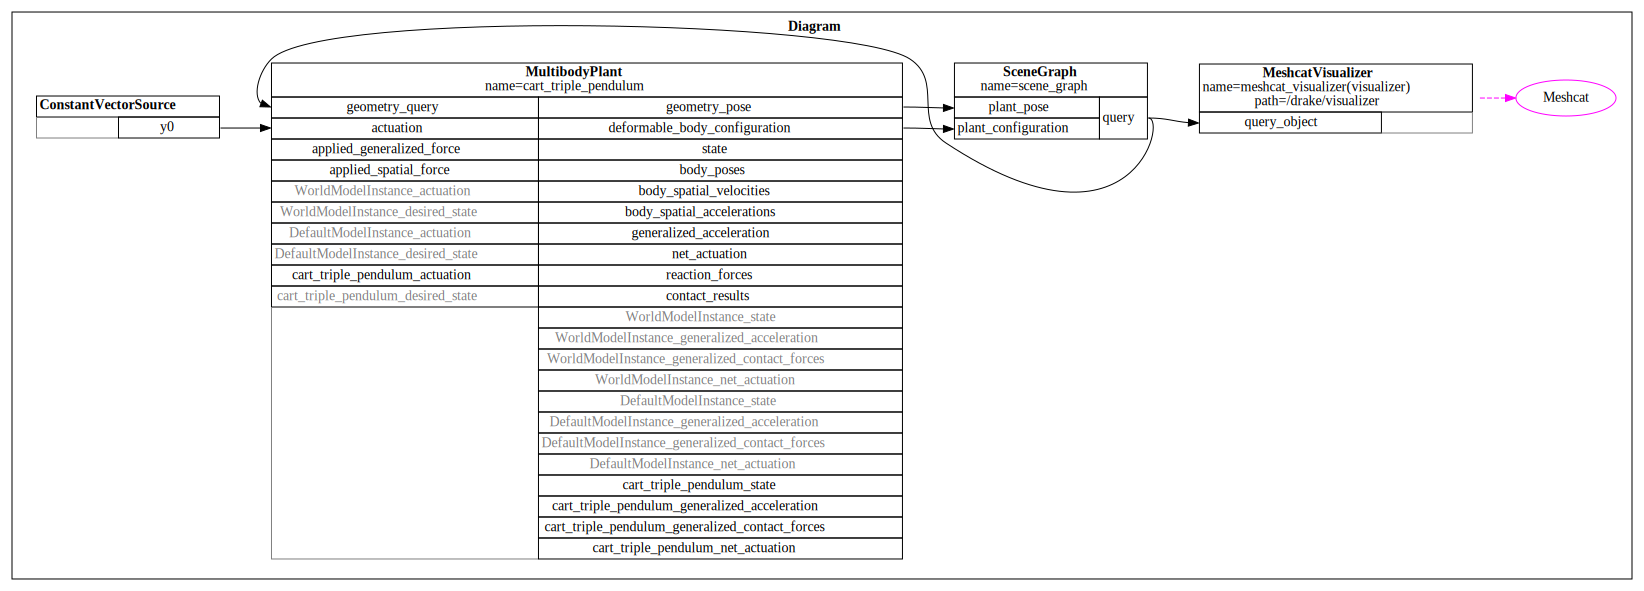

In [3]:
builder = DiagramBuilder()

plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.0)
Parser(plant).AddModels("cart_triple_pendulum.sdf")
plant.Finalize()
plant.set_name("cart_triple_pendulum")

force = ConstantVectorSource([3])
builder.AddSystem(force)
builder.Connect(force.get_output_port(), plant.get_actuation_input_port())

visualizer = MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat)

diagram = builder.Build()

display(SVG(pydot.graph_from_dot_data(diagram.GetGraphvizString())[0].create_svg()))

simulator = Simulator(diagram)


x0 = [0, np.deg2rad(0), 0, 0, 0, 0, 0, 0]
context = simulator.get_mutable_context()
context.SetContinuousState(x0)

simulator.Initialize()

visualizer.StartRecording(False)
simulator.AdvanceTo(3)
visualizer.PublishRecording()